<a href="https://colab.research.google.com/github/dimpalsonawane08/Emailspamfiltering/blob/main/EmployeeData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

# **Importing Dataset**

In [ ]:
dataset=pd.read_csv("/content/employeedata.zip")
dataset.columns
dataset.head()
dataset.shape

dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# **Data Cleaning**

In [ ]:
dataset.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### **we can see that there is no null values in given data so now we convert categorical data into numerical**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in dataset.select_dtypes(include=['object']):
    dataset[col] = label_encoder.fit_transform(dataset[col])


In [ ]:
#y_dict={"Yes":1,"No":0}
#dataset["Attrition_numeric"]=dataset["Attrition"].map(y_dict)
#dataset["Attrition_numeric"]

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.00,0.0,0.00,1.0
BusinessTravel,1470.0,1.607483,0.665455,0.0,1.00,2.0,2.00,2.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
Department,1470.0,1.260544,0.527792,0.0,1.00,1.0,2.00,2.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EducationField,1470.0,2.247619,1.331369,0.0,1.00,2.0,3.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


In [ ]:
dataset.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


some column in our dataset are not useful so let's drop down them.

In [ ]:
dataset.drop(["EmployeeCount","EmployeeNumber","Over18","StandardHours"],axis="columns",inplace=True)

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.0,0.0,0.00,1.0
BusinessTravel,1470.0,1.607483,0.665455,0.0,1.0,2.0,2.00,2.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
Department,1470.0,1.260544,0.527792,0.0,1.0,1.0,2.00,2.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EducationField,1470.0,2.247619,1.331369,0.0,1.0,2.0,3.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
Gender,1470.0,0.600000,0.490065,0.0,0.0,1.0,1.00,1.0


In [ ]:
attrition_yes = dataset.loc[dataset["Attrition"] == 1]
attrition_no = dataset.loc[dataset["Attrition"] == 0]

now we concat both the columns,rename the column and give it same colour.

In [ ]:
dataset_mean_attrition=pd.concat((attrition_yes.mean(),attrition_no.mean()),axis=1)
dataset_mean_attrition.columns=["yes","no"]
dataset_mean_attrition.round(2).style.background_gradient(cmap="tab20_r",axis=1)

,yes,no
Age,33.610000,37.560000
Attrition,1.000000,0.000000
BusinessTravel,1.610000,1.610000
DailyRate,750.360000,812.500000
Department,1.340000,1.250000
DistanceFromHome,10.630000,8.920000
Education,2.840000,2.930000
EducationField,2.330000,2.230000
EnvironmentSatisfaction,2.460000,2.770000
Gender,0.630000,0.590000


In [ ]:
dataset1=pd.read_csv("/content/employeedata.zip")
dataset1.columns
dataset1.head()

# **Exploratery Data Analysis**

In [ ]:
tasa_att=(dataset["Attrition"].sum()/dataset.shape[0])*100
print("avarage turnover rate of IBM:",round(tasa_att,2))

avarage turnover rate of IBM: 16.12


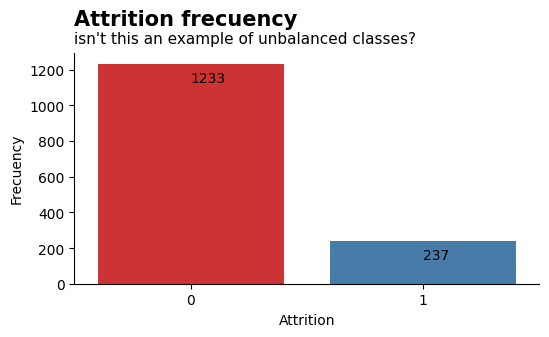

In [ ]:
#Let's plot "Attribute frequency"
colors=["C0EDD2","FF0018"]
dataset_class=dataset["Attrition"].value_counts().reset_index()
plt.figure(figsize=(6,3))
colors = sns.color_palette("Set1")

ax = sns.barplot(x="index", y="Attrition", data=dataset_class, palette=colors)

sns.despine()

# another way to make titles more personalized

#plt.title("$\\bf{Attrition frecuency}$" + "in't this an example of unbalanced classesy

ax.text(-0.5,1450, "Attrition frecuency",

fontsize=15,

fontweight="bold")

ax.text(-0.5,1350,"isn't this an example of unbalanced classes?", fontsize=11)

# with a loop I add the values to the graph text(x,y,s="values")
for num,text in enumerate(dataset_class["Attrition"]):
       ax.text(num, text-100, text)

plt.xlabel("Attrition")

plt.ylabel("Frecuency")
plt.show()

In [ ]:
dataset1=pd.read_csv("/content/employeedata.zip")
dataset1.columns
dataset1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
num_col=dataset.describe().columns.tolist()
cat_col=dataset1.describe(include="object").columns.tolist
cat_col

<bound method IndexOpsMixin.tolist of Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')>

In [ ]:
corr=dataset[num_col].corr()

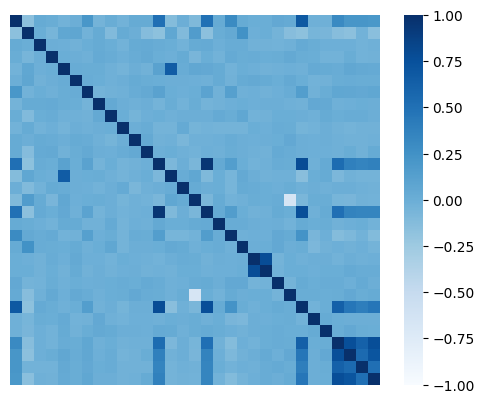

In [ ]:
x=sns.heatmap(
  corr,
  vmin=-1,vmax=1,center=0,
  cmap="Blues",
  square=True,xticklabels=False,yticklabels=False)
plt.show(block=False)

In [ ]:
corr["Attrition"].to_frame().style.background_gradient(cmap="Blues")

,Attrition
Age,-0.159205
Attrition,1.000000
BusinessTravel,0.000074
DailyRate,-0.056652
Department,0.063991
DistanceFromHome,0.077924
Education,-0.031373
EducationField,0.026846
EnvironmentSatisfaction,-0.103369
Gender,0.029453


In [ ]:
dataset1.describe(include="object").T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [ ]:
by_bussines=dataset.groupby("BusinessTravel")["Attrition"].value_counts (normalize=True).to_frame().unstack()

In [ ]:
by_bussines

Attrition          
Attrition              0         1
BusinessTravel                    
0               0.920000  0.080000
1               0.750903  0.249097
2               0.850431  0.149569

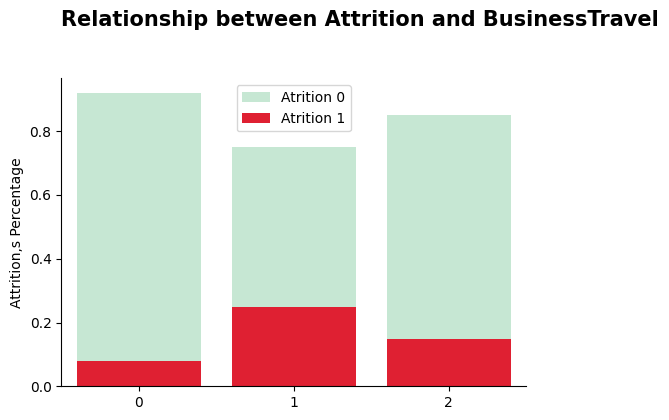

In [ ]:
plt.figure(figsize=(6,4))
ax= sns.barplot(x=by_bussines.index,y=('Attrition', 0),data=by_bussines,color="#C0EDD2",label="Atrition 0")
sns.barplot(x=by_bussines.index,y=('Attrition', 1),data=by_bussines,color="#FF0018",label="Atrition 1")
plt.ylabel('')
plt.ylabel("Attrition,s Percentage")
plt.xlabel("")
plt.grid(False)
sns.despine()
plt.legend()
# using text to personalize title
ax.text(-.5,1.13,"Relationship between Attrition and BusinessTravel",
        fontsize=15,
         fontweight='bold')
plt.show(block=False)


In [ ]:
dataset.pivot_table("Attrition",index="JobRole",columns=["BusinessTravel"])

BusinessTravel,0,1,2
JobRole,,,
0,0.066667,0.115385,0.055556
1,0.000000,0.400000,0.210526
2,0.071429,0.313725,0.244444
3,0.083333,0.000000,0.051948
4,0.000000,0.103448,0.067961
5,0.000000,0.000000,0.032258
6,0.142857,0.277778,0.133333
7,0.102564,0.220339,0.175439
8,0.000000,0.652174,0.327273


In [ ]:
by_jobRole=dataset.groupby("JobRole")["Attrition"].value_counts(normalize=True).to_frame().unstack()
by_jobRole

Attrition          
Attrition         0         1
JobRole                      
0          0.931298  0.068702
1          0.769231  0.230769
2          0.760618  0.239382
3          0.950980  0.049020
4          0.931034  0.068966
5          0.975000  0.025000
6          0.839041  0.160959
7          0.825153  0.174847
8          0.602410  0.397590

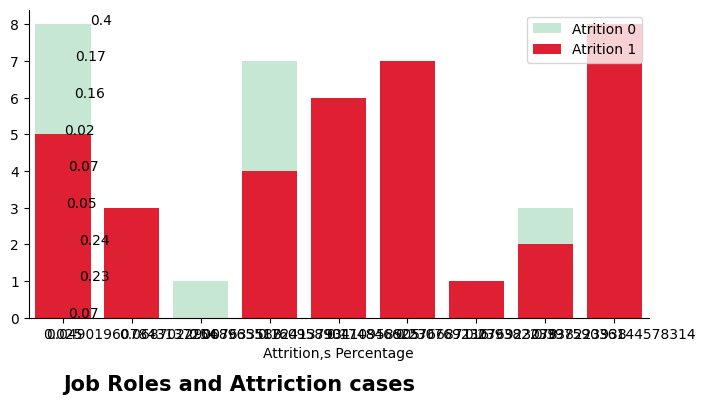

In [ ]:
plt.figure(figsize=(8,4))
ax=sns.barplot(y=by_jobRole.index,x=('Attrition', 0),data=by_jobRole,color="#C0EDD2",label="Atrition 0")
sns.barplot(y=by_jobRole.index,x=('Attrition', 1),data=by_jobRole,color="#FF0018",label="Atrition 1")


plt.ylabel("")
plt.xlabel("Attrition,s Percentage")
plt.grid(False)
sns.despine()
plt.legend()
ax.text(0,-2,"Job Roles and Attriction cases",
        fontsize=15,
         fontweight='bold')

# with a loop I add the values to the graphic
for num,text in zip(range(9),round(by_jobRole['Attrition', 1],2)):
    ax.text(text,num,text)
plt.show(block=False)

In [ ]:
by_department=dataset.groupby("Department")["Attrition"].value_counts(normalize=True).to_frame().unstack()
by_department

Attrition          
Attrition          0         1
Department                    
0           0.809524  0.190476
1           0.861602  0.138398
2           0.793722  0.206278

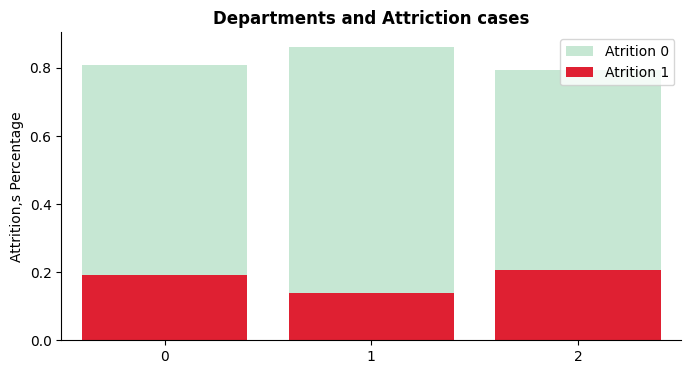

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x=by_department.index,y=('Attrition', 0),data=by_department,color="#C0EDD2",label="Atrition 0")
sns.barplot(x=by_department.index,y=('Attrition', 1),data=by_department,color="#FF0018",label="Atrition 1")
plt.ylabel('')
plt.title("Departments and Attriction cases",fontweight="bold")
plt.xlabel("")
plt.ylabel("Attrition,s Percentage")
plt.grid(False)
plt.legend()
sns.despine()


In [ ]:
cut_age = pd.cut (dataset["Age"],bins=[18, 30, 50, 60],include_lowest=False)
dataset.groupby(cut_age) ["Attrition"].value_counts (normalize=True).unstack()

Attrition,0,1
Age,,
"(18, 30]",0.746032,0.253968
"(30, 50]",0.873539,0.126461
"(50, 60]",0.874126,0.125874


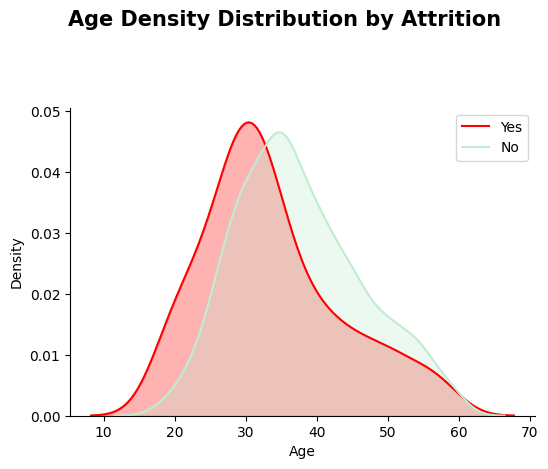

In [ ]:
plt.figure(figsize=(6,4))

ax=sns.distplot(attrition_yes["Age"],hist=False, label="Yes",color="r")
ax=sns.distplot(attrition_no["Age"],hist=False, label="No",color="#C0EDD2")

plt.ylabel("Density")
plt.legend()

# Get the two lines from the axes to generate shading

l1=ax. lines[0]

l2=ax.lines[1]

#Get the xy data from the lines so that we can shade

x1=l1.get_xydata()[:,0]

y1 = l1.get_xydata()[:,1]

x2=l2.get_xydata()[:,0]
y2=l2.get_xydata()[:,1]

ax.fill_between(x1,y1, color="red", alpha=0.3)

ax.fill_between(x2,y2, color="#C0EDD2", alpha=0.3)

sns.despine()

ax.text(5,0.064,"Age Density Distribution by Attrition",
        fontsize=15,
        fontweight='bold')

plt.show()

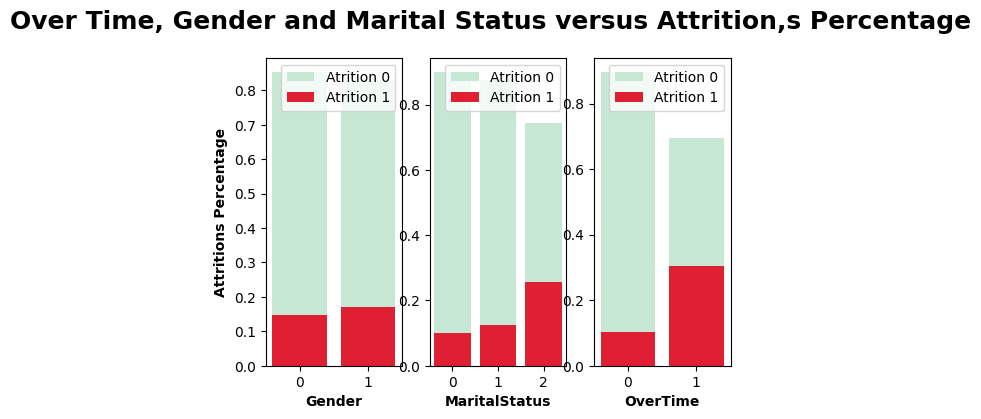

In [ ]:
plt.figure(figsize=(6,4))
plt.suptitle("Over Time, Gender and Marital Status versus Attrition,s Percentage", fontweight="bold", fontsize=18,y=1.0)
for i,column in enumerate(["Gender", "MaritalStatus", "OverTime"],1):
    group=dataset.groupby(column)["Attrition"].value_counts (normalize=True).to_frame().unstack()
    plt.subplot(1, 3,i)
    sns.barplot(x=group.index,y=("Attrition", 0),data=group, color="#C0EDD2", label="Atrition 0")
    sns.barplot(x=group. index,y=("Attrition", 1),data=group, color="#FF0018", label="Atrition 1")
    if i==1:
       plt.ylabel("Attritions Percentage", fontweight="bold")
    else:
       plt.ylabel("", fontweight="bold")
    plt.xlabel(column, fontweight="bold")
    plt.legend()
    plt.grid(False)

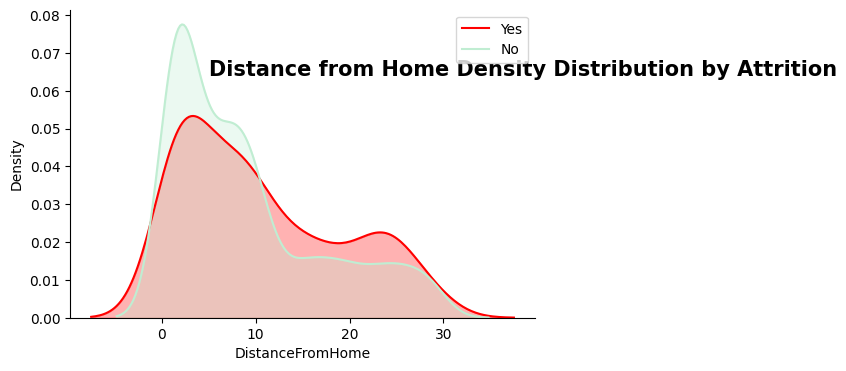

In [ ]:
plt.figure(figsize=(6,4))

ax=sns.distplot(attrition_yes["DistanceFromHome"],hist=False, label="Yes",color="r")
ax=sns.distplot(attrition_no["DistanceFromHome"],hist=False, label="No",color="#C0EDD2")

plt.ylabel("Density")
plt.legend()

# Get the two lines from the axes to generate shading

l1=ax. lines[0]

l2=ax.lines[1]

#Get the xy data from the lines so that we can shade

x1=l1.get_xydata()[:,0]

y1 = l1.get_xydata()[:,1]

x2=l2.get_xydata()[:,0]
y2=l2.get_xydata()[:,1]

ax.fill_between(x1,y1, color="red", alpha=0.3)

ax.fill_between(x2,y2, color="#C0EDD2", alpha=0.3)

sns.despine()

ax.text(5,0.064,"Distance from Home Density Distribution by Attrition",
        fontsize=15,
        fontweight='bold')

plt.show()

In [ ]:
cut_distance = pd.cut (dataset["DistanceFromHome"],bins=[18, 30, 50, 60],include_lowest=False)
dataset.groupby(cut_age) ["Attrition"].value_counts (normalize=True).unstack()

Attrition,0,1
Age,,
"(18, 30]",0.746032,0.253968
"(30, 50]",0.873539,0.126461
"(50, 60]",0.874126,0.125874


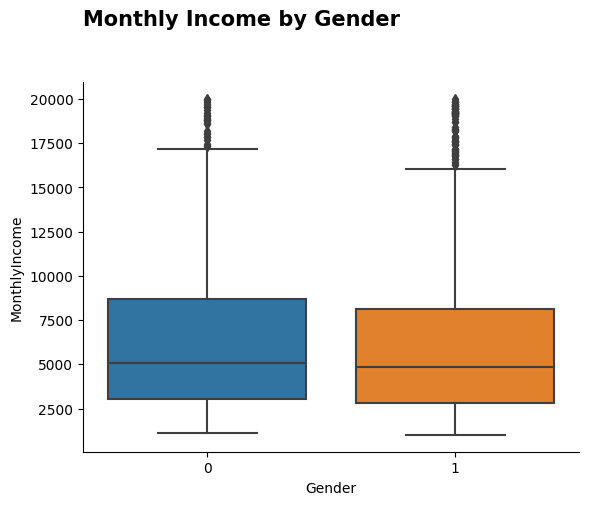

In [ ]:
ax = sns.boxplot(x="Gender",y="MonthlyIncome", data=dataset)
sns.despine()
ax.text(-0.5,24158, "Monthly Income by Gender",
                            fontsize=15,
                            fontweight="bold")
plt.show(block=False)

In [ ]:
dataset.pivot_table("MonthlyIncome",index="JobRole",columns="Gender")

Gender,0,1
JobRole,,
0,7433.803922,7589.300000
1,4540.687500,4100.222222
2,3246.905882,3232.413793
3,16915.276596,17409.327273
4,7409.166667,7182.671233
5,15144.484848,16657.787234
6,3344.473684,3173.044944
7,6764.310606,7033.123711
8,2671.947368,2587.200000


In [ ]:
jobrole_income=dataset.groupby("JobRole")["MonthlyIncome"].describe()

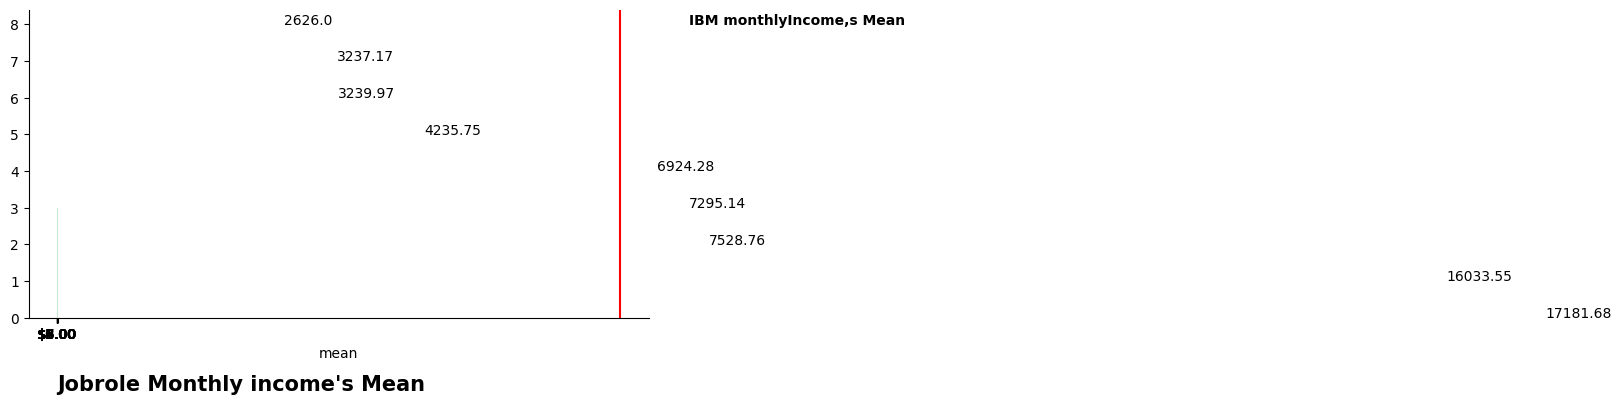

In [ ]:
Job_income_mean= jobrole_income["mean"].reset_index().sort_values(by="mean", ascending=False)
import matplotlib.ticker as ticker
plt.figure(figsize=(8,4))
ax=sns.barplot(y="JobRole",x="mean",data=Job_income_mean,color="#C0EDD2")
#with axvline we can draw a vertical line
ax.axvline(dataset["MonthlyIncome"].mean(),color="red")
plt.ylabel("")
plt.ylabel("")
plt.grid(False)
sns.despine()
#add $ to acis
formatter=ticker.FormatStrFormatter("$%1.2f")
ax.xaxis.set_major_formatter(formatter)
#add text anotation
ax.text(7300, 8, "IBM monthlyIncome,s Mean", horizontalalignment="left", size="medium", color="black", weight="semibold")
for text ,num in zip(round(Job_income_mean["mean"],2),range(9)):
    ax.text(text,num, text)
ax.text( -0.3, -2, "Jobrole Monthly income's Mean",
          fontsize=15,
          fontweight= "bold")
plt.show()

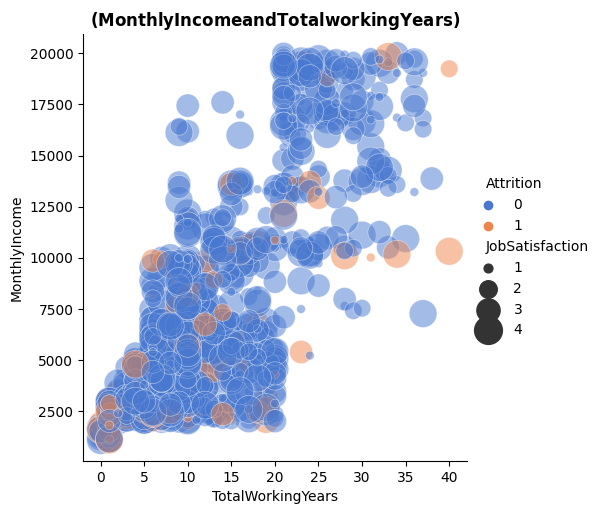

In [ ]:
ax=sns.relplot(x="TotalWorkingYears", y="MonthlyIncome", hue="Attrition", size="JobSatisfaction",
               sizes=(40, 400), alpha=.5, palette="muted",
               height=5, data=dataset)
sns.despine()
plt.title("$\\bf (MonthlyIncome and TotalworkingYears)$")
plt.show(block=False)

In [ ]:
obj_dtypes=[i for i in dataset1.select_dtypes(include=np.object).columns]
obj_dtypes

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
for feat in obj_dtypes:
    dataset1[feat]=le.fit_transform(dataset1[feat].astype(str))
print (dataset1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

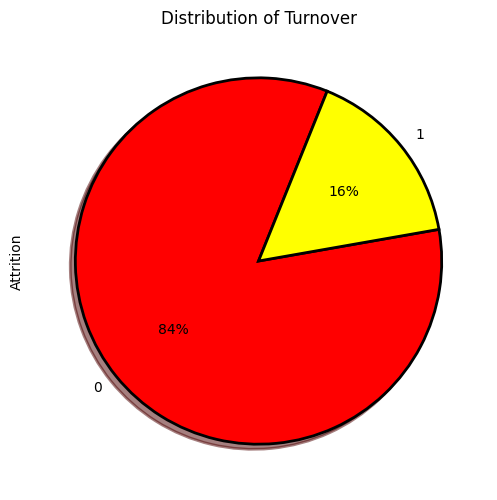

In [ ]:
fig=plt.figure(figsize=(13,6))
plt.subplot(121)
dataset['Attrition'].value_counts().plot.pie(autopct ="%1.0f%%",colors=['red', 'yellow'],startangle= 68, wedgeprops={"linewidth":2,"edgecolor":"k"},shadow="True")
plt.title("Distribution of Turnover")
plt.show()

In [ ]:
dataset['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [ ]:
x=dataset.drop("Attrition", axis=1)
y=dataset["Attrition"]

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
x_resampled,y_resampled=SMOTE().fit_resample(x,y)

In [ ]:
y_resampled.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_resampled, y_resampled, test_size=0.1, random_state=0)

# **Building the Model**

# **Logistic Regression**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

parameters = {
    'penalty' : ['l1','l2'],
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(x_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=5)

In [ ]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 10.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.837312142842617


In [ ]:
logreg=LogisticRegression(C=1.0,
                          penalty="l2",
                          solver="newton-cg",)
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
print("Accuracy:",logreg.score(x_test,y_test))

Accuracy: 0.8218623481781376


In [ ]:
import sklearn.metrics as metrics
classification_report_tuned = metrics.classification_report(y_test , y_pred)
print(classification_report_tuned)


              precision    recall  f1-score   support

           0       0.82      0.79      0.81       115
           1       0.82      0.85      0.84       132

    accuracy                           0.82       247
   macro avg       0.82      0.82      0.82       247
weighted avg       0.82      0.82      0.82       247



In [ ]:
from sklearn.metrics import accuracy_score
acc_scr_log_yuned= (accuracy_score(y_test , y_pred))
print('Overall accuracy of logistic regression model:', acc_scr_log_yuned)


Overall accuracy of logistic regression model: 0.8218623481781376
